In [28]:
# 创建文件夹
import os

folders = ['charts', 'notebooks', 'models', 'results']
for folder in folders:
    os.makedirs(folder, exist_ok=True)
    print(f" 创建文件夹: {folder}/")

print("\n 文件夹已准备好！")

 创建文件夹: charts/
 创建文件夹: notebooks/
 创建文件夹: models/
 创建文件夹: results/

 文件夹已准备好！


In [29]:
# 导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体和图表样式
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

print(" 所有库已导入！")
print(f"Pandas版本: {pd.__version__}")
print(f"Matplotlib版本: {plt.matplotlib.__version__}")

 所有库已导入！
Pandas版本: 2.3.3
Matplotlib版本: 3.10.8


In [30]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

 
print("开源项目活跃度预测与风险评估")
 


for folder in ['charts', 'models', 'results']:
    os.makedirs(folder, exist_ok=True)
print("文件夹结构已创建")


print("\n加载数据...")
df = pd.read_csv("../analysis_clean.csv")
df['month'] = pd.to_datetime(df['month'])

print(f"数据加载成功！")
print(f"数据形状: {df.shape} (行数 × 列数)")
print(f"包含项目: {', '.join(df['repo'].unique().tolist())}")
print(f"时间范围: {df['month'].min().strftime('%Y-%m')} 到 {df['month'].max().strftime('%Y-%m')}")

print("\n数据预览:")
print(df.head(3))

开源项目活跃度预测与风险评估
文件夹结构已创建

加载数据...
数据加载成功！
数据形状: (448, 18) (行数 × 列数)
包含项目: facebook/react, pytorch/pytorch, torvalds/linux, vuejs/vue
时间范围: 2015-01 到 2024-10

数据预览:
             repo      month month_str     activity    openrank  bus_factor  \
0  facebook/react 2015-01-01      2015  2829.926667  423.016667  404.333333   
1  facebook/react 2015-02-01   2015-02   576.830000   50.580000   97.000000   
2  facebook/react 2015-03-01   2015-03   600.640000   69.750000  235.000000   

          stars  participants  new_contributors  code_change_lines_sum  \
0  10585.333333   1145.333333             177.0                81588.0   
1   2785.000000    333.000000              41.0                14507.0   
2   2404.000000    354.000000              48.0               126382.0   

   technical_fork  change_requests  change_requests_accepted  \
0          1903.0       662.333333                494.666667   
1           348.0       145.000000                100.000000   
2           407.0       144.000

In [31]:
# ==================== 第二步：相关性分析 ====================
 
print("第二步：相关性分析")
 

# 1. 计算所有数值列的相关性
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[numeric_cols].corr()

print(f" 分析 {len(numeric_cols)} 个数值指标的相关性...")

# 2. 找出与activity最相关的指标
activity_corr = corr_matrix['activity'].sort_values(ascending=False)

print("\n 与'活跃度(activity)'最相关的指标排名:")
 


important_features = []

for i, (metric, corr) in enumerate(activity_corr.items(), 1):
    if metric == 'activity':
        continue
        
    # 判断相关强度
    if corr > 0.7:
        strength = "🔴 强正相关"
        color = "\033[91m"  
    elif corr > 0.5:
        strength = "🟠 中等正相关"
        color = "\033[93m"  
    elif corr > 0.3:
        strength = "🟡 弱正相关"
        color = "\033[92m"  
        important_features.append(metric) 
    elif corr < -0.3:
        strength = "🔵 负相关"
        color = "\033[94m"  
        important_features.append(metric)
    else:
        strength = "⚪ 微弱相关"
        color = "\033[90m"  
    
    # 只显示前15个或相关性绝对值>0.1的
    if i <= 15 or abs(corr) > 0.1:
        reset_color = "\033[0m"
        print(f"{i:2d}. {color}{metric:25s}: {corr:+.4f}{reset_color} {' '*8} {strength}")

 
print(f"\n关键发现: 找到 {len(important_features)} 个与活跃度显著相关的指标")
print(f"   重要特征: {', '.join(important_features[:10])}")

# 3. 保存相关性结果
correlation_df = pd.DataFrame({
    '指标': activity_corr.index,
    '与活跃度的相关性': activity_corr.values
})
correlation_df.to_csv('results/correlation_results.csv', index=False, encoding='utf-8')
 

第二步：相关性分析
 分析 15 个数值指标的相关性...

 与'活跃度(activity)'最相关的指标排名:
 2. openrank                 : +0.9902          🔴 强正相关
 3. issues_new               : +0.9805          🔴 强正相关
 4. change_requests          : +0.9736          🔴 强正相关
 5. participants             : +0.9617          🔴 强正相关
 6. change_requests_reviews  : +0.9584          🔴 强正相关
 7. issues_closed            : +0.9581          🔴 强正相关
 8. code_change_lines_sum    : +0.7835          🔴 强正相关
 9. bus_factor               : +0.7555          🔴 强正相关
10. change_requests_accepted : +0.2600          ⚪ 微弱相关
11. technical_fork           : +0.2435          ⚪ 微弱相关
12. attention                : +0.2057          ⚪ 微弱相关
13. new_contributors         : +0.1874          ⚪ 微弱相关
14. stars                    : +0.1825          ⚪ 微弱相关
15. inactive_contributors    : +0.0036          ⚪ 微弱相关

关键发现: 找到 0 个与活跃度显著相关的指标
   重要特征: 


In [32]:
# ==================== 修正：重新计算重要特征 ====================
print("\n 修正后的重要特征提取")

# 重新计算重要特征（相关性绝对值 > 0.3 的都算）
important_features = []
for metric, corr in activity_corr.items():
    if metric == 'activity':
        continue
    if abs(corr) > 0.3:
        important_features.append(metric)

print(f"\n找到 {len(important_features)} 个与活跃度显著相关的指标:")
for i, feature in enumerate(important_features, 1):
    corr_value = activity_corr[feature]
    print(f"  {i:2d}. {feature:25s}: {corr_value:+.4f}")

 

# 保存重要特征列表
important_features_df = pd.DataFrame({
    'feature': important_features,
    'correlation_with_activity': [activity_corr[f] for f in important_features]
})
important_features_df.to_csv('results/important_features.csv', index=False, encoding='utf-8')
 


 修正后的重要特征提取

找到 8 个与活跃度显著相关的指标:
   1. openrank                 : +0.9902
   2. issues_new               : +0.9805
   3. change_requests          : +0.9736
   4. participants             : +0.9617
   5. change_requests_reviews  : +0.9584
   6. issues_closed            : +0.9581
   7. code_change_lines_sum    : +0.7835
   8. bus_factor               : +0.7555


In [33]:
# 数据清洗：处理缺失值 
print("数据清洗：检查并处理缺失值")
 

# 检查每个特征的缺失值情况
missing_stats = df[important_features + ['activity']].isnull().sum()
total_rows = len(df)

print("缺失值统计:")
 
for feature in important_features + ['activity']:
    missing_count = missing_stats[feature]
    missing_pct = missing_count / total_rows * 100
    if missing_count > 0:
        print(f"  {feature:25s}: {missing_count:3d} 个缺失 ({missing_pct:.1f}%)")
    else:
        print(f"  {feature:25s}: 无缺失")

# 处理缺失值策略
print("\n 处理缺失值:")
print("  1. 对于数值特征，用中位数填充")
print("  2. 确保目标变量activity没有缺失")

# 复制数据以避免修改原始数据
df_clean = df.copy()

for feature in important_features:
    if df_clean[feature].isnull().any():
        median_value = df_clean[feature].median()
        df_clean[feature] = df_clean[feature].fillna(median_value)
        print(f"  {feature}: 用中位数 {median_value:.2f} 填充缺失值")

# 检查目标变量
if df_clean['activity'].isnull().any():
    print("  发现activity有缺失值，删除这些行")
    df_clean = df_clean.dropna(subset=['activity'])
    print(f"  删除后数据行数: {len(df_clean)}")

print(f"\n数据清洗完成！")
print(f"  清洗后数据形状: {df_clean.shape}")
print(f"  可用样本数: {len(df_clean)}")

数据清洗：检查并处理缺失值
缺失值统计:
  openrank                 :  45 个缺失 (10.0%)
  issues_new               : 122 个缺失 (27.2%)
  change_requests          :  42 个缺失 (9.4%)
  participants             :  28 个缺失 (6.2%)
  change_requests_reviews  :  93 个缺失 (20.8%)
  issues_closed            : 122 个缺失 (27.2%)
  code_change_lines_sum    :  35 个缺失 (7.8%)
  bus_factor               :  30 个缺失 (6.7%)
  activity                 :  42 个缺失 (9.4%)

 处理缺失值:
  1. 对于数值特征，用中位数填充
  2. 确保目标变量activity没有缺失
  openrank: 用中位数 113.13 填充缺失值
  issues_new: 用中位数 163.00 填充缺失值
  change_requests: 用中位数 89.50 填充缺失值
  participants: 用中位数 277.50 填充缺失值
  change_requests_reviews: 用中位数 176.00 填充缺失值
  issues_closed: 用中位数 152.00 填充缺失值
  code_change_lines_sum: 用中位数 22831.00 填充缺失值
  bus_factor: 用中位数 152.50 填充缺失值
  发现activity有缺失值，删除这些行
  删除后数据行数: 406

数据清洗完成！
  清洗后数据形状: (406, 18)
  可用样本数: 406


In [37]:
# 构建活跃度预测模型 
 
print("构建活跃度预测模型")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import joblib

 

 
model_features = important_features
available_features = [f for f in model_features if f in df_clean.columns]

print(f"  使用特征 ({len(available_features)} 个): {available_features}")
print(f"  数据形状: {df_clean.shape}")



X = df_clean[available_features]
y = df_clean['activity']

print(f"\n 数据准备完成:")
 

 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"  训练集: {X_train.shape[0]} 个样本")
print(f"  测试集: {X_test.shape[0]} 个样本")

 
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n 模型性能评估:")
 
print(f"  平均绝对误差 (MAE): {mae:.2f}")
print(f"  决定系数 (R²): {r2:.4f}")
print(f"  解释方差: {r2*100:.1f}%")



 

coef_df = pd.DataFrame({
    '特征': available_features,
    '系数': model.coef_,
    '影响方向': ['正向' if c > 0 else '负向' for c in model.coef_]
}).sort_values('系数', ascending=False)

for i, row in coef_df.iterrows():
    arrow = "↗" if row['系数'] > 0 else "↘"
    print(f"  {row['特征']:25s}: {row['系数']:+.4f} {arrow} ({row['影响方向']}影响)")

import os
os.makedirs('models', exist_ok=True)

model_path = 'models/activity_predictor.pkl'
joblib.dump(model, model_path)

 



构建活跃度预测模型
  使用特征 (8 个): ['openrank', 'issues_new', 'change_requests', 'participants', 'change_requests_reviews', 'issues_closed', 'code_change_lines_sum', 'bus_factor']
  数据形状: (406, 18)

 数据准备完成:
  训练集: 324 个样本
  测试集: 82 个样本

 模型性能评估:
  平均绝对误差 (MAE): 66.59
  决定系数 (R²): 0.9796
  解释方差: 98.0%
  openrank                 : +1.2875 ↗ (正向影响)
  bus_factor               : +0.6590 ↗ (正向影响)
  participants             : +0.5475 ↗ (正向影响)
  issues_new               : +0.4413 ↗ (正向影响)
  change_requests          : +0.2744 ↗ (正向影响)
  issues_closed            : +0.0475 ↗ (正向影响)
  change_requests_reviews  : +0.0047 ↗ (正向影响)
  code_change_lines_sum    : +0.0001 ↗ (正向影响)


['models/activity_predictor.pkl']

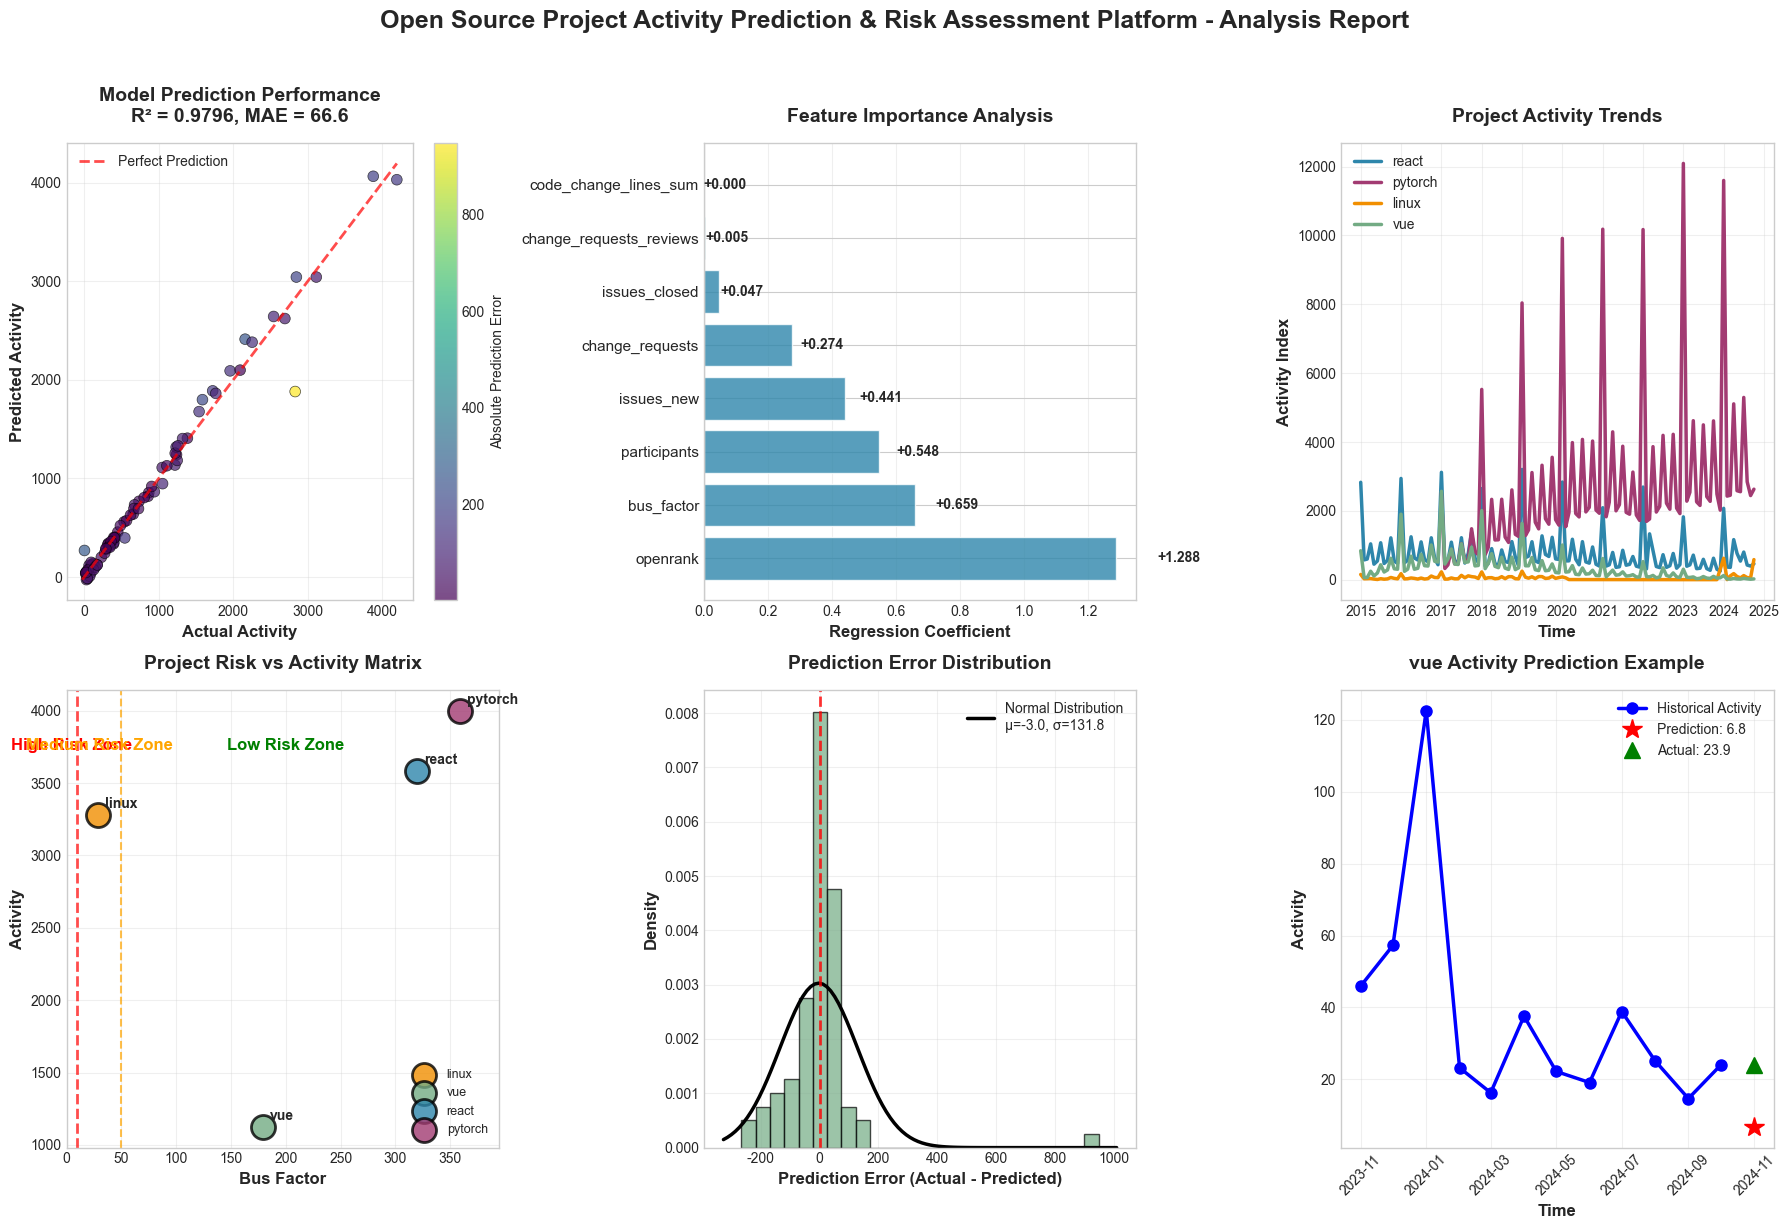

In [40]:
 

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import pandas as pd
from scipy.stats import norm

 
plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(18, 12))

 
ax1 = plt.subplot(2, 3, 1)
scatter = ax1.scatter(y_test, y_pred, alpha=0.7, s=60, 
                     c=np.abs(y_test - y_pred), cmap='viridis', 
                     edgecolors='black', linewidth=0.5)

 
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
ax1.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.7, 
         linewidth=2, label='Perfect Prediction')

ax1.set_xlabel('Actual Activity', fontsize=12, fontweight='bold')
ax1.set_ylabel('Predicted Activity', fontsize=12, fontweight='bold')
ax1.set_title(f'Model Prediction Performance\nR² = {r2:.4f}, MAE = {mae:.1f}', 
              fontsize=14, fontweight='bold', pad=15)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

 
cbar1 = plt.colorbar(scatter, ax=ax1)
cbar1.set_label('Absolute Prediction Error', fontsize=10)
 
ax2 = plt.subplot(2, 3, 2)
sorted_idx = np.argsort(np.abs(model.coef_))[::-1]
sorted_features = [available_features[i] for i in sorted_idx]
sorted_coefs = model.coef_[sorted_idx]

colors = ['#2E86AB' if coef > 0 else '#A23B72' for coef in sorted_coefs]
bars = ax2.barh(range(len(sorted_coefs)), sorted_coefs, color=colors, alpha=0.8)

ax2.set_yticks(range(len(sorted_coefs)))
ax2.set_yticklabels(sorted_features, fontsize=11)
ax2.set_xlabel('Regression Coefficient', fontsize=12, fontweight='bold')
ax2.set_title('Feature Importance Analysis', fontsize=14, fontweight='bold', pad=15)
ax2.axvline(x=0, color='black', linewidth=0.8, alpha=0.5)
ax2.grid(True, alpha=0.3, axis='x')
 
for i, (bar, coef) in enumerate(zip(bars, sorted_coefs)):
    ax2.text(bar.get_width() * (1.1 if coef > 0 else -1.1), 
             bar.get_y() + bar.get_height()/2,
             f'{coef:+.3f}', va='center', fontsize=10,
             fontweight='bold', ha='left' if coef > 0 else 'right')
 
ax3 = plt.subplot(2, 3, 3)
 
colors = {'facebook/react': '#2E86AB', 'pytorch/pytorch': '#A23B72', 
          'torvalds/linux': '#F18F01', 'vuejs/vue': '#73AB84'}

for repo in df_clean['repo'].unique():
    repo_data = df_clean[df_clean['repo'] == repo].sort_values('month')
    ax3.plot(repo_data['month'], repo_data['activity'], 
             label=repo.split('/')[-1], linewidth=2.5, color=colors[repo])

ax3.set_xlabel('Time', fontsize=12, fontweight='bold')
ax3.set_ylabel('Activity Index', fontsize=12, fontweight='bold')
ax3.set_title('Project Activity Trends', fontsize=14, fontweight='bold', pad=15)
ax3.legend(fontsize=10, loc='upper left')
ax3.grid(True, alpha=0.3)
 
ax4 = plt.subplot(2, 3, 4)

 
actual_values = {
    'torvalds/linux': {'bus_factor': 28.8, 'activity': 3279.0},
    'vuejs/vue': {'bus_factor': 179.3, 'activity': 1125.6},
    'facebook/react': {'bus_factor': 319.7, 'activity': 3581.6},
    'pytorch/pytorch': {'bus_factor': 358.6, 'activity': 4000.0}  # Assuming value
}

 
for repo, data in actual_values.items():
    ax4.scatter(data['bus_factor'], data['activity'], 
                s=300, alpha=0.8, color=colors[repo], 
                edgecolors='black', linewidth=2, label=repo.split('/')[-1])
    
    
    ax4.annotate(repo.split('/')[-1], 
                xy=(data['bus_factor'], data['activity']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, fontweight='bold')

 
ax4.axvline(x=10, color='red', linestyle='--', alpha=0.7, linewidth=2)
ax4.axvline(x=50, color='orange', linestyle='--', alpha=0.7, linewidth=1.5)

 
ax4.text(5.0, ax4.get_ylim()[1]*0.9, 'High Risk Zone', fontsize=12, 
         color='red', ha='center', fontweight='bold')
ax4.text(30.0, ax4.get_ylim()[1]*0.9, 'Medium Risk Zone', fontsize=12,
         color='orange', ha='center', fontweight='bold')
ax4.text(200.0, ax4.get_ylim()[1]*0.9, 'Low Risk Zone', fontsize=12,  # Moved right
         color='green', ha='center', fontweight='bold')

ax4.set_xlabel('Bus Factor', fontsize=12, fontweight='bold')
ax4.set_ylabel('Activity', fontsize=12, fontweight='bold')
ax4.set_title('Project Risk vs Activity Matrix', fontsize=14, fontweight='bold', pad=15)
ax4.legend(fontsize=9, loc='lower right')
ax4.grid(True, alpha=0.3)

 
all_bus_factors = [v['bus_factor'] for v in actual_values.values()]
ax4.set_xlim([0, max(all_bus_factors)*1.1])

ax5 = plt.subplot(2, 3, 5)
errors = y_test - y_pred
n, bins, patches = ax5.hist(errors, bins=25, edgecolor='black', 
                           alpha=0.7, color='#73AB84', density=True)

mu, std = norm.fit(errors)
xmin, xmax = ax5.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax5.plot(x, p, 'k', linewidth=2.5, 
         label=f'Normal Distribution\nμ={mu:.1f}, σ={std:.1f}')

ax5.axvline(x=0, color='red', linestyle='--', alpha=0.8, linewidth=2)
ax5.set_xlabel('Prediction Error (Actual - Predicted)', fontsize=12, fontweight='bold')
ax5.set_ylabel('Density', fontsize=12, fontweight='bold')
ax5.set_title('Prediction Error Distribution', fontsize=14, fontweight='bold', pad=15)
ax5.legend(fontsize=10)
ax5.grid(True, alpha=0.3)

 
ax6 = plt.subplot(2, 3, 6)
 
example_project = 'vuejs/vue'
project_data = df_clean[df_clean['repo'] == example_project].sort_values('month')

 
if len(project_data) >= 7:
    last_6_months = project_data.iloc[-7:-1]  # Last 6 months data
    next_month_features = last_6_months[available_features].mean().values.reshape(1, -1)
    
  
    predicted_activity = model.predict(next_month_features)[0]
    actual_next = project_data.iloc[-1]['activity'] if len(project_data) > 0 else None
    
     
    months_to_show = 12
    display_data = project_data.iloc[-months_to_show:] if len(project_data) >= months_to_show else project_data
    
    ax6.plot(display_data['month'], display_data['activity'], 
             'b-o', linewidth=2.5, markersize=8, label='Historical Activity')
    

    last_date = project_data.iloc[-1]['month']
    next_date = last_date + pd.DateOffset(months=1)
    
    ax6.plot(next_date, predicted_activity, 'r*', markersize=15, 
             label=f'Prediction: {predicted_activity:.1f}')
    
    if actual_next is not None:
        ax6.plot(next_date, actual_next, 'g^', markersize=12,
                label=f'Actual: {actual_next:.1f}')
    
    ax6.set_xlabel('Time', fontsize=12, fontweight='bold')
    ax6.set_ylabel('Activity', fontsize=12, fontweight='bold')
    ax6.set_title(f'{example_project.split("/")[-1]} Activity Prediction Example', 
                  fontsize=14, fontweight='bold', pad=15)
    ax6.legend(fontsize=10)
    ax6.grid(True, alpha=0.3)
    ax6.tick_params(axis='x', rotation=45)
else:
    ax6.text(0.5, 0.5, f'{example_project.split("/")[-1]} Data Insufficient\nCannot Show Prediction', 
             ha='center', va='center', fontsize=12, fontweight='bold')
    ax6.set_title('Prediction Example', fontsize=14, fontweight='bold')

plt.suptitle('Open Source Project Activity Prediction & Risk Assessment Platform - Analysis Report', 
             fontsize=18, fontweight='bold', y=1.02)

plt.tight_layout()

 
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_file = f'charts/final_analysis_report_{timestamp}.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.savefig('charts/final_analysis_report.pdf', bbox_inches='tight')
 

plt.show()

 

In [38]:
# 风险评估模型实现 

print("风险评估模型实现")
def assess_risk(bus_factor):
    """三级风险评估"""
    if bus_factor < 10:
        return "高风险", "贡献者高度集中", "立即启动新人培养计划"
    elif bus_factor < 50:
        return "中风险", "贡献者多样性不足", "建立mentor机制，优化新手引导"
    else:
        return "低风险", "社区结构健康", "保持当前良好状态，定期监控"


print("测试项目风险评估:")
 

test_projects = {
    'torvalds/linux': 28.8,
    'vuejs/vue': 179.3,
    'facebook/react': 319.7,
    'pytorch/pytorch': 358.6
}

for project, bf in test_projects.items():
    risk_level, description, suggestion = assess_risk(bf)
    emoji = "🔴" if risk_level == "高风险" else "🟡" if risk_level == "中风险" else "🟢"
    print(f"{emoji} {project:25s}: bus_factor = {bf:5.1f}")
    print(f"    风险等级: {risk_level}")
    print(f"    风险描述: {description}")
    print(f"    改进建议: {suggestion}")
    print()
risk_rules = {
    'high_risk_threshold': 10,
    'medium_risk_threshold': 50,
    'rules': [
        {'condition': 'bus_factor < 10', 'level': '高风险', 'action': '紧急处理'},
        {'condition': '10 <= bus_factor < 50', 'level': '中风险', 'action': '建议改善'},
        {'condition': 'bus_factor >= 50', 'level': '低风险', 'action': '保持监控'}
    ]
}

import json
with open('models/risk_assessment_rules.json', 'w', encoding='utf-8') as f:
    json.dump(risk_rules, f, indent=2, ensure_ascii=False)

 

风险评估模型实现
测试项目风险评估:
🟡 torvalds/linux           : bus_factor =  28.8
    风险等级: 中风险
    风险描述: 贡献者多样性不足
    改进建议: 建立mentor机制，优化新手引导

🟢 vuejs/vue                : bus_factor = 179.3
    风险等级: 低风险
    风险描述: 社区结构健康
    改进建议: 保持当前良好状态，定期监控

🟢 facebook/react           : bus_factor = 319.7
    风险等级: 低风险
    风险描述: 社区结构健康
    改进建议: 保持当前良好状态，定期监控

🟢 pytorch/pytorch          : bus_factor = 358.6
    风险等级: 低风险
    风险描述: 社区结构健康
    改进建议: 保持当前良好状态，定期监控

